# Makine Öğrenmesi / 201 (Doğrusal Regresyon Modelleri)

## Basit Doğrusal Regresyon


### Basit Doğrusal Regresyon Model

In [1]:
import pandas as pd 
df=pd.read_csv("reading_data/Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
import seaborn as sns

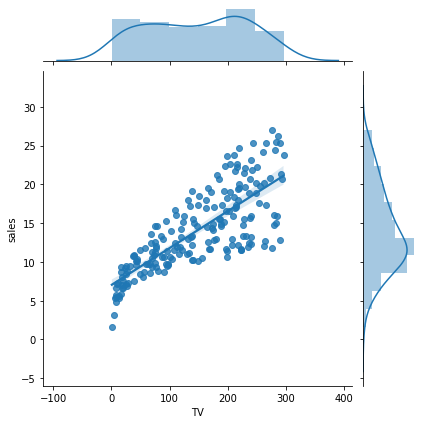

In [4]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X=df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y=df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [8]:
reg=LinearRegression()

In [11]:
model=reg.fit(X,y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [20]:
#sabit sayı
model.intercept_

array([7.03259355])

In [21]:
#beta1 katsayı
model.coef_

array([[0.04753664]])

In [16]:
#rkare
model.score(X,y)

0.611875050850071

### Basit Doğrusal Regresyon Tahmin


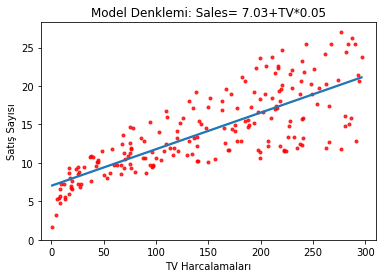

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.regplot(X,y,ci=None,scatter_kws={"color":"r","s":9})
g.set_title("Model Denklemi: Sales= 7.03+TV*0.05")
g.set_xlabel("TV Harcalamaları")
g.set_ylabel("Satış Sayısı")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [23]:
model.predict([[165]])

array([[14.87613922]])

In [24]:
model.intercept_+model.coef_*165

array([[14.87613922]])

In [25]:
yeni_veri=[[5],[15],[30]]

In [26]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### Hatalar ve Makine Öğrenmesindeki Önemi
MSE: Hata Kareler Ortalaması

RMSE: Hata Kareler Ortalaması Karekökü

In [31]:
gercek_y= y.head(10)

In [33]:
tahmin_y=pd.DataFrame(model.predict(X)[0:10])

In [38]:
hatalar= pd.concat([gercek_y,tahmin_y],axis=1)
hatalar.columns=["gercek_y","tahmin_y"]
hatalar

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [39]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_y"]

In [40]:
hatalar

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [41]:
hatalar["hata_kareler"]=hatalar["hata"]**2
hatalar

,gercek_y,tahmin_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [43]:
import numpy as np
np.mean(hatalar["hata_kareler"])

9.290350329638105

## Çoklu Doğrusal Regresyon


In [ ]:
#beta=(X^T*X)^-1*X^T*Y ile parametlere bulunur ancak n>1000 gibi büyük değerler oldugunda X'in tersinin alınması mümkün olmamaktadır. 
#bu gibi durumlarda gradient descent gibi yaklaşımlar kullanılmaktadır. Esas amaç gerçek değerler ile tahmin edilen değerlerin farklarının
#karelerinin toplamlarını minimum yapmaya çalışacak şekilde katsayıları bulmaya çalışmaktır.

### Çoklu Doğrusal Regresyon Model


In [45]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
X= df.drop("sales",axis=1)
y=df[["sales"]]

In [47]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [50]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


StatsModels ile model kurmak

In [54]:
import statsmodels.api as sm

In [55]:
lm = sm.OLS(y,X)

In [56]:
model= lm.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                   2.43e-171
Time:                        12:01:52   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scikit Learn ile model kurmak

In [58]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [59]:
model= lm.fit(X,y)

In [60]:
model.intercept_

array([2.93888937])

In [61]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Çoklu Doğrusal Regresyon Tahmin


Sales= 2.94 + 0.04*TV + 0.19*Radio - 0.001*Newspaper

In [66]:
# 30 birim TV, 10 birim Radio,40 birim gazete
Sales = 2.94 + 0.04*30 +0.19*10 - 0.001*40
Sales

5.999999999999999

In [67]:
yeni_veri = [[30],[10],[40]]

In [72]:
yeni_veri=pd.DataFrame(yeni_veri)
yeni_veri

,0,1,2
0,30,10,40


In [73]:
model.predict(yeni_veri)

array([[6.15562918]])

In [75]:
from sklearn.metrics import mean_squared_error

In [77]:
MSE= mean_squared_error(y,model.predict(X))
MSE

2.784126314510936

In [79]:
RMSE=np.sqrt(MSE)
RMSE

1.6685701407225697

### Çoklu Doğrusal Regresyon Model Tuning (Model Doğrulama)

In [80]:
#sınama seti
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=99)

In [82]:
X_train.head()

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [83]:
y_train.head()

,sales
16,12.5
51,10.7
97,15.5
164,11.9
71,12.4


In [84]:
lm=LinearRegression()

In [85]:
model=lm.fit(X_train,y_train)

In [87]:
#train hatası
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.7236824822650754

In [88]:
#test hatası
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

1.4312783138301641

k-katlı cross validation

In [90]:
from sklearn.model_selection import cross_val_score

In [92]:
cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [94]:
#cv ile elde edilmiş MSE değeri
np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error"))

3.3170289742341246

In [95]:
#cv ile elde edilmiş RMMSE değeri
np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

1.8212712522395242

## Ridge Regresyon

### Ridge Regresyon Model

Gerekli Kütüphaneler

In [98]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

Veri Seti

In [99]:
df=pd.read_csv("reading_data/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [100]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [101]:
df.shape

(263, 20)

In [109]:
ridge_model=Ridge(alpha=5).fit(X_train,y_train)

In [103]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [111]:
ridge_model.intercept_

-3.4251968687146928

In [113]:
lambdalar=10**np.linspace(10,-2,100)*0.5

In [114]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [115]:
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [116]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

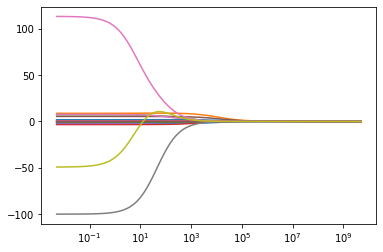

In [117]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

### Ridge Regresyon Tahmin


In [119]:
ridge_model=Ridge().fit(X_train,y_train)

In [121]:
y_pred=ridge_model.predict(X_train)

In [122]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [123]:
y[0:10]

1      475.000
2      480.000
3      500.000
4       91.500
5      750.000
6       70.000
7      100.000
8       75.000
9     1100.000
10     517.143
Name: Salary, dtype: float64

In [126]:
#train hatası
RMSE=np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.34470696006565

In [125]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")))

351.3931585606318

In [127]:
#test hatası
y_pred=ridge_model.predict(X_test)

In [128]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.8082905730239

### Ridge Regresyon Model Tuning


In [131]:
lambdalar1=np.random.randint(0,1000,100)

In [132]:
lambdalar2=10**np.linspace(10,-2,100)*0.5

In [137]:
ridgecv=RidgeCV(alphas=lambdalar2,scoring="neg_mean_squared_error",cv=10,normalize=True)

In [138]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [139]:
ridgecv.alpha_

0.7599555414764666

In [140]:
#son modeli oluşturma

In [142]:
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)

In [144]:
#test hatası
y_pred=ridge_tuned.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.858304727152

## Lasso Regresyon


### Lasso Regresyon Model

In [145]:
#regulerized regression olarak da geçer. 
#Ridge L1 olarak Lasso L2 olarak geçer

In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,LassoCV

In [2]:
df=pd.read_csv("reading_data/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape

(263, 20)

In [6]:
lasso_model=Lasso().fit(X_train,y_train)

C:\Users\feyza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


In [7]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
lasso_model.intercept_

-5.587450677336733

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [11]:
#farklı lambda değerlerine karşılık katsayılar

In [20]:
lasso = Lasso()
coefs =[]
alphas=10**np.linspace(10,-2,100)*0.5
for i in alphas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)
    

C:\Users\feyza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
C:\Users\feyza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
C:\Users\feyza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
C:\Users\feyza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

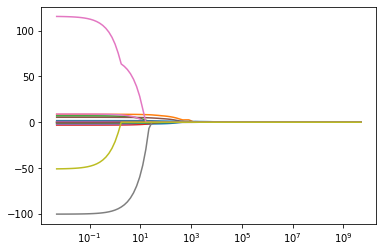

In [21]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

### Lasso Regresyon Tahmin


In [22]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [23]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [24]:
y_pred = lasso_model.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554033

In [26]:
r2_score(y_test,y_pred)

0.4142279813236619

### Lasso Regresyon Model Tuning


In [36]:
alphas=10**np.linspace(10,-2,100)*0.5

In [37]:
lasso_cv_model = LassoCV(alphas=alphas, cv=10,max_iter=100000).fit(X_train,y_train)

In [38]:
lasso_cv_model.alpha_

201.85086292982749

In [43]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [31]:
#ikinci yöntem
# lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [44]:
y_pred = lasso_tuned.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037446

In [47]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## ElasticNet Regresyon


### ElasticNet Regresyon Model ve Tahmini

In [48]:
#L1 ve L2 yaklaşımlarını birleştirir.

In [49]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [50]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [51]:
enet_model=ElasticNet().fit(X_train,y_train)

C:\Users\feyza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [52]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [53]:
enet_model.intercept_

-6.465955602113127

In [55]:
#Tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [56]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [58]:
y_pred = enet_model.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [60]:
r2_score(y_test,y_pred)

0.41070222469326945

### ElasticNet Regresyon Model Tuning


In [61]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

In [63]:
enet_cv_model.alpha_

5230.7647364798695

In [67]:
#final model
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [68]:
y_pred = enet_tuned.predict(X_test)

In [69]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795